# Customer Churn Analysis
The objective is to:
1. Identify Key Drivers of Churn
2. Assess Churn Rates
3. Analyze Service Usage
4. Evaluate Customer Tenure Impacts
5. Understand Payment Methods Influence
6. Identify Customer Segments at Risk
7. Develop Predictive Models
8. Generate Actionable Insights
9. Monitor Trends Over Time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("customer_churn.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
data = df

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
data.duplicated().sum()

0

In [7]:
customer_5 = data.loc[:,'Dependents']
customer_5

,Dependents
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,Yes
7041,No


In [12]:
# Extract 15th column
customer_5 = df.iloc[:,15]
customer_5


,Contract
0,Month-to-month
1,One year
2,Month-to-month
3,One year
4,Month-to-month
...,...
7038,One year
7039,One year
7040,Month-to-month
7041,Month-to-month


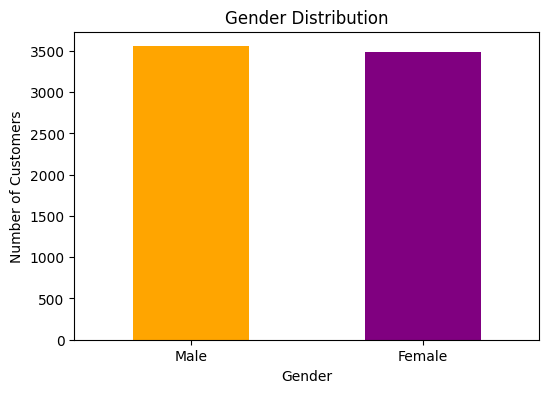

In [40]:
# Customer distribution based on gender
plt.figure(figsize=(6,4))
gender_counts = df['gender'].value_counts()
gender_counts.plot(kind='bar',color=['orange', 'purple'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

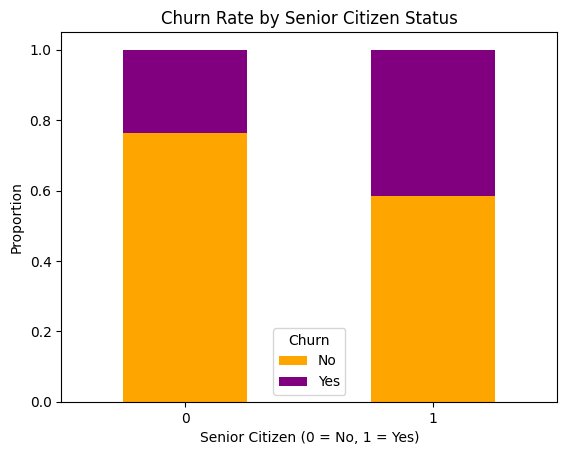

In [38]:
# Churn rate by senior citizen status
senior_churn_rate = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
senior_churn_rate.plot(kind='bar', stacked=True, color=['orange', 'purple'])
plt.title('Churn Rate by Senior Citizen Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

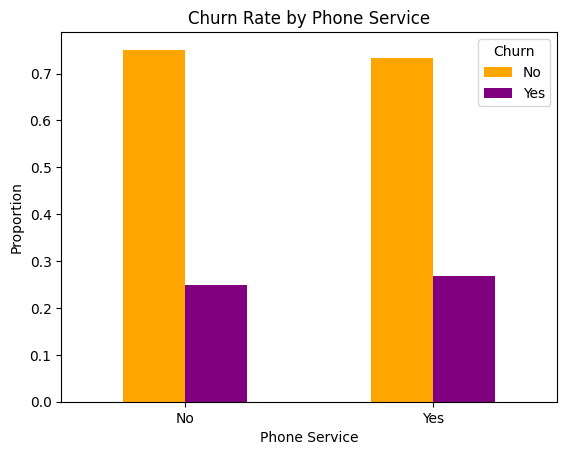

In [37]:
# Churn rate based on PhoneService
phone_service_churn = df.groupby('PhoneService')['Churn'].value_counts(normalize=True).unstack()
phone_service_churn.plot(kind='bar', color=['orange', 'purple'])
plt.title('Churn Rate by Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


- Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’
- Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’


In [14]:
senior_male_electronic = df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Electronic check')]


In [15]:
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [16]:

x = df['tenure'] > 70
y = df['MonthlyCharges'] >100
senior_male_electronic= df[x][y]
senior_male_electronic

<ipython-input-16-843d3e6b47e9>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  senior_male_electronic= df[x][y]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
59,5954-BDFSG,Female,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),107.50,7853.7,No
94,9848-JQJTX,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),100.90,7459.05,No
106,6728-DKUCO,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,104.15,7303.05,No
193,9680-NIAUV,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),109.70,8129.3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,3508-CFVZL,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,111.30,7985.9,No
6934,6257-DTAYD,Male,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),104.15,7365.3,No
6992,0218-QNVAS,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,No,Bank transfer (automatic),100.55,7113.75,No
7022,7203-OYKCT,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.3,No


In [17]:
customer_Total_Tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]


In [18]:
customer_Total_Tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [19]:
x = df['tenure']>70
y = df['MonthlyCharges']>100
customer_Total_Tenure = df[(x)|(y)]
customer_Total_Tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


- Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’
- Extract 333 random records from the customer_churn dataframe & store the result in ‘customer_333’
- Get the count of different levels from the ‘Churn’ column


In [20]:
two_mail_yes=df[(df["Contract"]== "Two year") & (df['PaymentMethod']=="Mailed check") &(df['Churn']=="Yes")]
two_mail_yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [ ]:
# Extracted random saamples
customer_333= df.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3045,9114-AAFQH,Female,0,Yes,No,48,Yes,No,DSL,No,...,Yes,No,No,Yes,One year,Yes,Electronic check,65.65,3094.65,No
5086,3705-PSNGL,Male,0,No,No,45,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,20.40,930.45,Yes
3036,4702-HDRKD,Male,0,No,No,67,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),49.35,3321.35,No
5814,0787-LHDYT,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.60,330.25,No
5238,7841-FCRQD,Female,0,Yes,No,33,Yes,No,DSL,No,...,No,Yes,No,No,One year,Yes,Credit card (automatic),53.75,1857.3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4812,5174-RNGBH,Female,0,No,No,9,Yes,No,DSL,No,...,No,Yes,Yes,No,Month-to-month,No,Mailed check,66.25,620.55,Yes
6826,7976-CICYS,Male,0,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.70,83.75,No
3179,3721-WKIIL,Female,0,No,No,27,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.60,561.15,No
6489,9318-NKNFC,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,18.85,18.85,Yes


In [21]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


<Figure size 400x300 with 0 Axes>

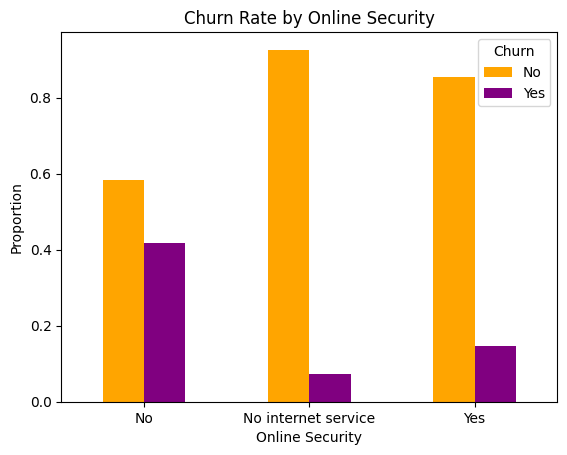

In [46]:
# Churn rate for online security
plt.figure(figsize=(4,3))
online_security_churn = df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).unstack()
online_security_churn.plot(kind='bar', color=['orange', 'purple'])
plt.title('Churn Rate by Online Security')
plt.xlabel('Online Security')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


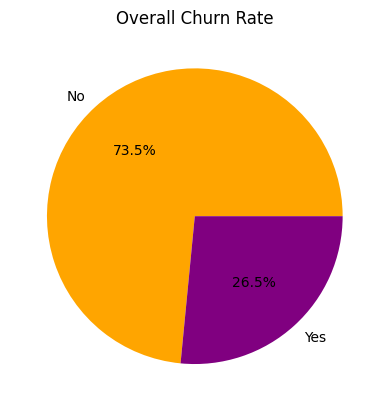

In [42]:
# Overall churn rate
overall_churn_rate = df['Churn'].value_counts(normalize=True)
overall_churn_rate.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'purple'])
plt.title('Overall Churn Rate')
plt.ylabel('')
plt.show()


<Figure size 600x400 with 0 Axes>

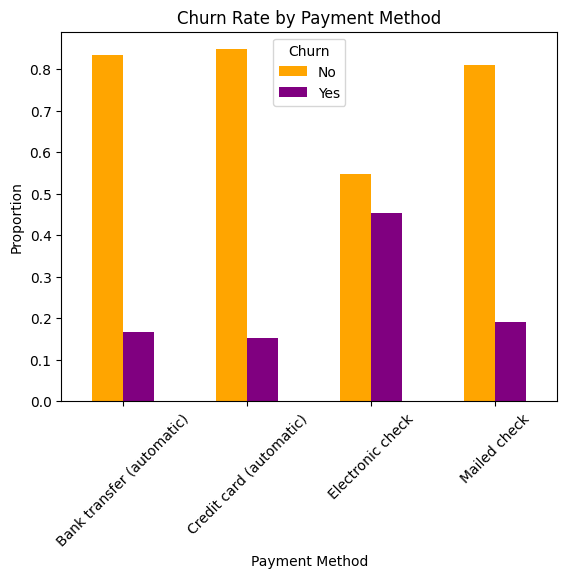

In [48]:
# Churn rate by Payment Method
plt.figure(figsize=(6,4))
payment_method_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
payment_method_churn.plot(kind='bar', color=['orange', 'purple'])
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()


##visualization

Build a bar-plot for the ’InternetService’ column:
- Set x-axis label to ‘Categories of Internet Service’
- Set y-axis label to ‘Count of Categories’
- Set the title of plot to be ‘Distribution of Internet Service’
- Set the color of the bars to be ‘orange’






Build a histogram for the ‘tenure’ column:
- Set the number of bins to be 30
- Set the color of the bins  to be ‘green’
- Assign the title ‘Distribution of tenure’


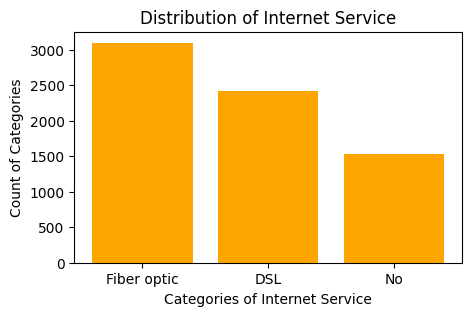

In [24]:
plt.figure(figsize = (5,3))
x = df['InternetService'].value_counts().keys()
y = df['InternetService'].value_counts()
plt.bar(x, y, color = 'orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()


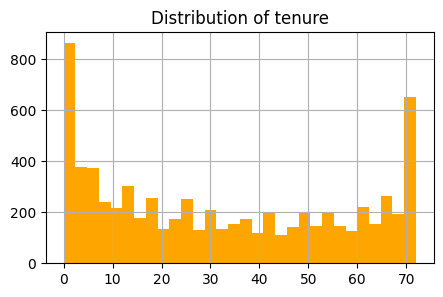

In [52]:
#df['tenure'].hist()
plt.figure(figsize=(5,3))
df['tenure'].hist(bins=30,color=['orange'])
plt.title('Distribution of tenure')
plt.show()


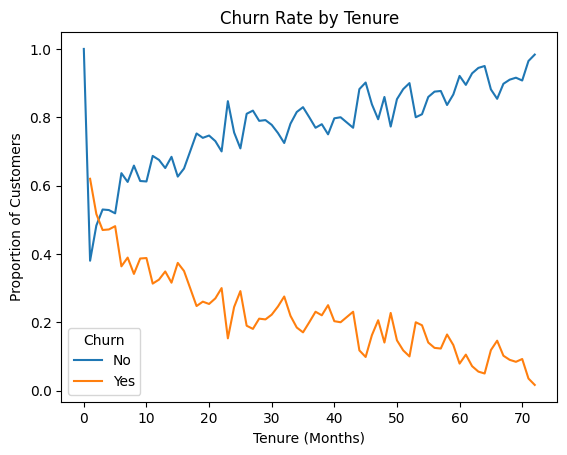

In [54]:
# Churn rate by tenure
tenure_churn = df.groupby('tenure')['Churn'].value_counts(normalize=True).unstack()
tenure_churn.plot(kind='line')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Proportion of Customers')
plt.show()

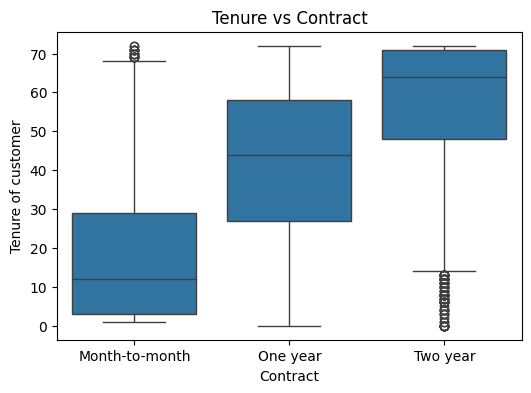

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Contract', y='tenure', data=df)
plt.xlabel('Contract')
plt.ylabel('Tenure of customer')
plt.title('Tenure vs Contract')
plt.show()


##Machine Learning

Linear Regression:



Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’
- Divide the dataset into train and test sets in 70:30 ratio.
- Build the model on train set and predict the values on test set
- After predicting the values, find the root mean square error
- Find out the error in prediction & store the result in ‘error’
- Find the root mean square error


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = df[['tenure']]
y = df['MonthlyCharges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
error = y_test - y_pred
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 29.07936015646814


Logistic Regression:


Build a  logistic regression model where dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’
- Divide the dataset in 65:35 ratio
- Build the model on train set and predict the values on test set
- Build the confusion matrix and get the accuracy score



Build a  logistic regression model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ & ‘MonthlyCharges’
- Divide the dataset in 80:20 ratio
- Build the model on train set and predict the values on test set
- Build the confusion matrix and get the accuracy score


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

X = np.array(df[['tenure', 'MonthlyCharges']])
y = np.array(df['Churn'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 99)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_test, y_test)

logistic_y_pred = logistic_regression_model.predict(X_test)

confusion_matrix(y_test, logistic_y_pred)
accuracy_score(y_test, logistic_y_pred)


0.7735982966643009

Decision Tree:
Build a decision tree model where dependent variable is ‘Churn’ & independent variable is ‘tenure’
Divide the dataset in 80:20 ratio
Build the model on train set and predict the values on test set
Build the confusion matrix and calculate the accuracy


In [32]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

X = np.array(df['tenure']).reshape(-1,1)
y = np.array(df['Churn']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 99)

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)


0.7437899219304471

For this dataset to predict the churn rate in future based on given features the logistic regression model giving better accuracy.

    Insights and Recommendations:

    **Demographic Insights**
Gender Trends: Number of customers based on gender is almost similar.
Senior Citizens at Risk: Senior citizens display a significantly higher churn rate compared to younger customers, suggesting a need for tailored support or benefits for this group to improve retention.

    **Customer Tenure**
Short Tenure, High Churn: Customers with shorter tenure (e.g., less than 6 months) are more likely to churn. This indicates the importance of engaging and onboarding new customers effectively to enhance their experience.

Long-Term Loyalty: Customers with longer tenure tend to have lower churn rates, suggesting that positive experiences accumulate over time. Initiatives to reward long-term customers could strengthen loyalty.

    **Service Usage**

Phone and Internet Services: Customers with and without a phone service have equal churn rates.


    **Payment Method Analysis**
 Customers who prefer electronic check methods show higher churn rates, indicating that problems in billing could be a factor in customer churn.

    **Tech Support Importance**
Customers who utilize tech support services are less likely to churn, suggesting that providing high-quality support is crucial in retaining customers.


    **Overall Churn Rate Analysis**
  The overall churn rate can be benchmarked against industry standards to evaluate performance. This analysis can help set realistic retention goals and measure success over time.



**Actionable Recommendations**
Implement Targeted Retention Strategies: Based on the identified risk factors, develop and implement targeted retention strategies tailored to at-risk segments, focusing on personalized communication and service offerings.
Enhance Customer Support: Invest in customer support enhancements to provide timely assistance, especially for senior citizens and customers who exhibit lower engagement.
Promote Long-Term Contracts: Create incentives for customers to switch to longer-term contracts, such as discounts or added benefits, to reduce churn rates.